# Proyek Analisis Data: [GYM Member Exercise]
---

**Kelompok 8**

* Nama: Fernando Manuel
* NIM : 1202223288
* Nama: Safrina Auriya Anantasya Agustine
* NIM : 1202223197


Dataset Gym Members Exercise ini memiliki 973 baris dan 15 kolom, dimana dataset tersebut berisi beberapa hal seperti:

* Age: Usia anggota gym.
* Gender: Jenis kelamin anggota gym (Pria atau Wanita).
* Weight (kg): Berat anggota dalam kilogram.
* High (m): Tinggi anggota dalam meter.
* Max_BPM: Denyut jantung maksimum (detak per menit) selama sesi latihan.
* Avg_BPM: Denyut jantung rata-rata selama sesi latihan.
* Resting_BPM: Denyut jantung saat istirahat sebelum latihan.
* Session_Duration (jam): Durasi setiap sesi latihan dalam jam.
* Calories_Burned: Total kalori yang dibakar selama setiap sesi.
* Workout_Type: Jenis latihan yang dilakukan (misalnya, Kardio, Kekuatan, Yoga, HIIT).
* Fat_Percentage: Persentase lemak tubuh anggota.
* Water_Intake (liter): Asupan air harian selama latihan.
* Workout_Frequency (hari/minggu): Jumlah sesi latihan per minggu.
* Experience_Level: Tingkat pengalaman, dari pemula (1) hingga ahli (3).
* BMI: Indeks Massa Tubuh, dihitung dari tinggi dan berat badan.

# Business Understanding

* Bagaimana jenis latihan gym dapat mempengaruhi ukuran BMI (Body Mass Index)?

* Bagaimana algoritma logistic regression dapat memprediksi jenis latihan gym berdasarkan atribut anggota gym seperti usia, berat badan, durasi sesi, dan frekuensi latihan?

* Bagaimana algoritma K-Means dapat mengelompokkan anggota gym berdasarkan profil fisik mereka, seperti BMI, persentase lemak tubuh, dan durasi sesi latihan?

# **Data Wrangling**
Ditahap ini kita menggunakan 3 proses Data Wrangling diantaranya adalah:

a. Gathering Data
Mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah yang dihadapi

b. Assesing Data
Penilaian terhadap data untuk menilai kualitas dan struktur data

c. Cleaning Data
Pembersihan data melalui analisis dari permasalahan

## Gathering Data
Pada tahap ini kita mengumpulkan data dan diubah menjadi DataFrame yang akan digunakan.

In [91]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/CuPid168/GYM_Exercise_Kelompok8/refs/heads/main/data/gym_members_exercise_tracking.csv')
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


## Assessing Data
Langkah selanjutnya adalah melakukan penilaian kualitas data. Disini kita dapat mengetahui permasalahan dalam data yang dianalisis.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [93]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [94]:
df.nunique()

,0
Age,42
Gender,2
Weight (kg),532
Height (m),51
Max_BPM,40
Avg_BPM,50
Resting_BPM,25
Session_Duration (hours),147
Calories_Burned,621
Workout_Type,4


In [95]:
print("Jumlah data yang terduplikasi ada :",df.duplicated().sum())

Jumlah data yang terduplikasi ada : 0


## Data Cleaning
Pada tahap ini kita akan membetulkan permasalahan yang muncul pada saat kita melakukan assesing data.

In [96]:
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


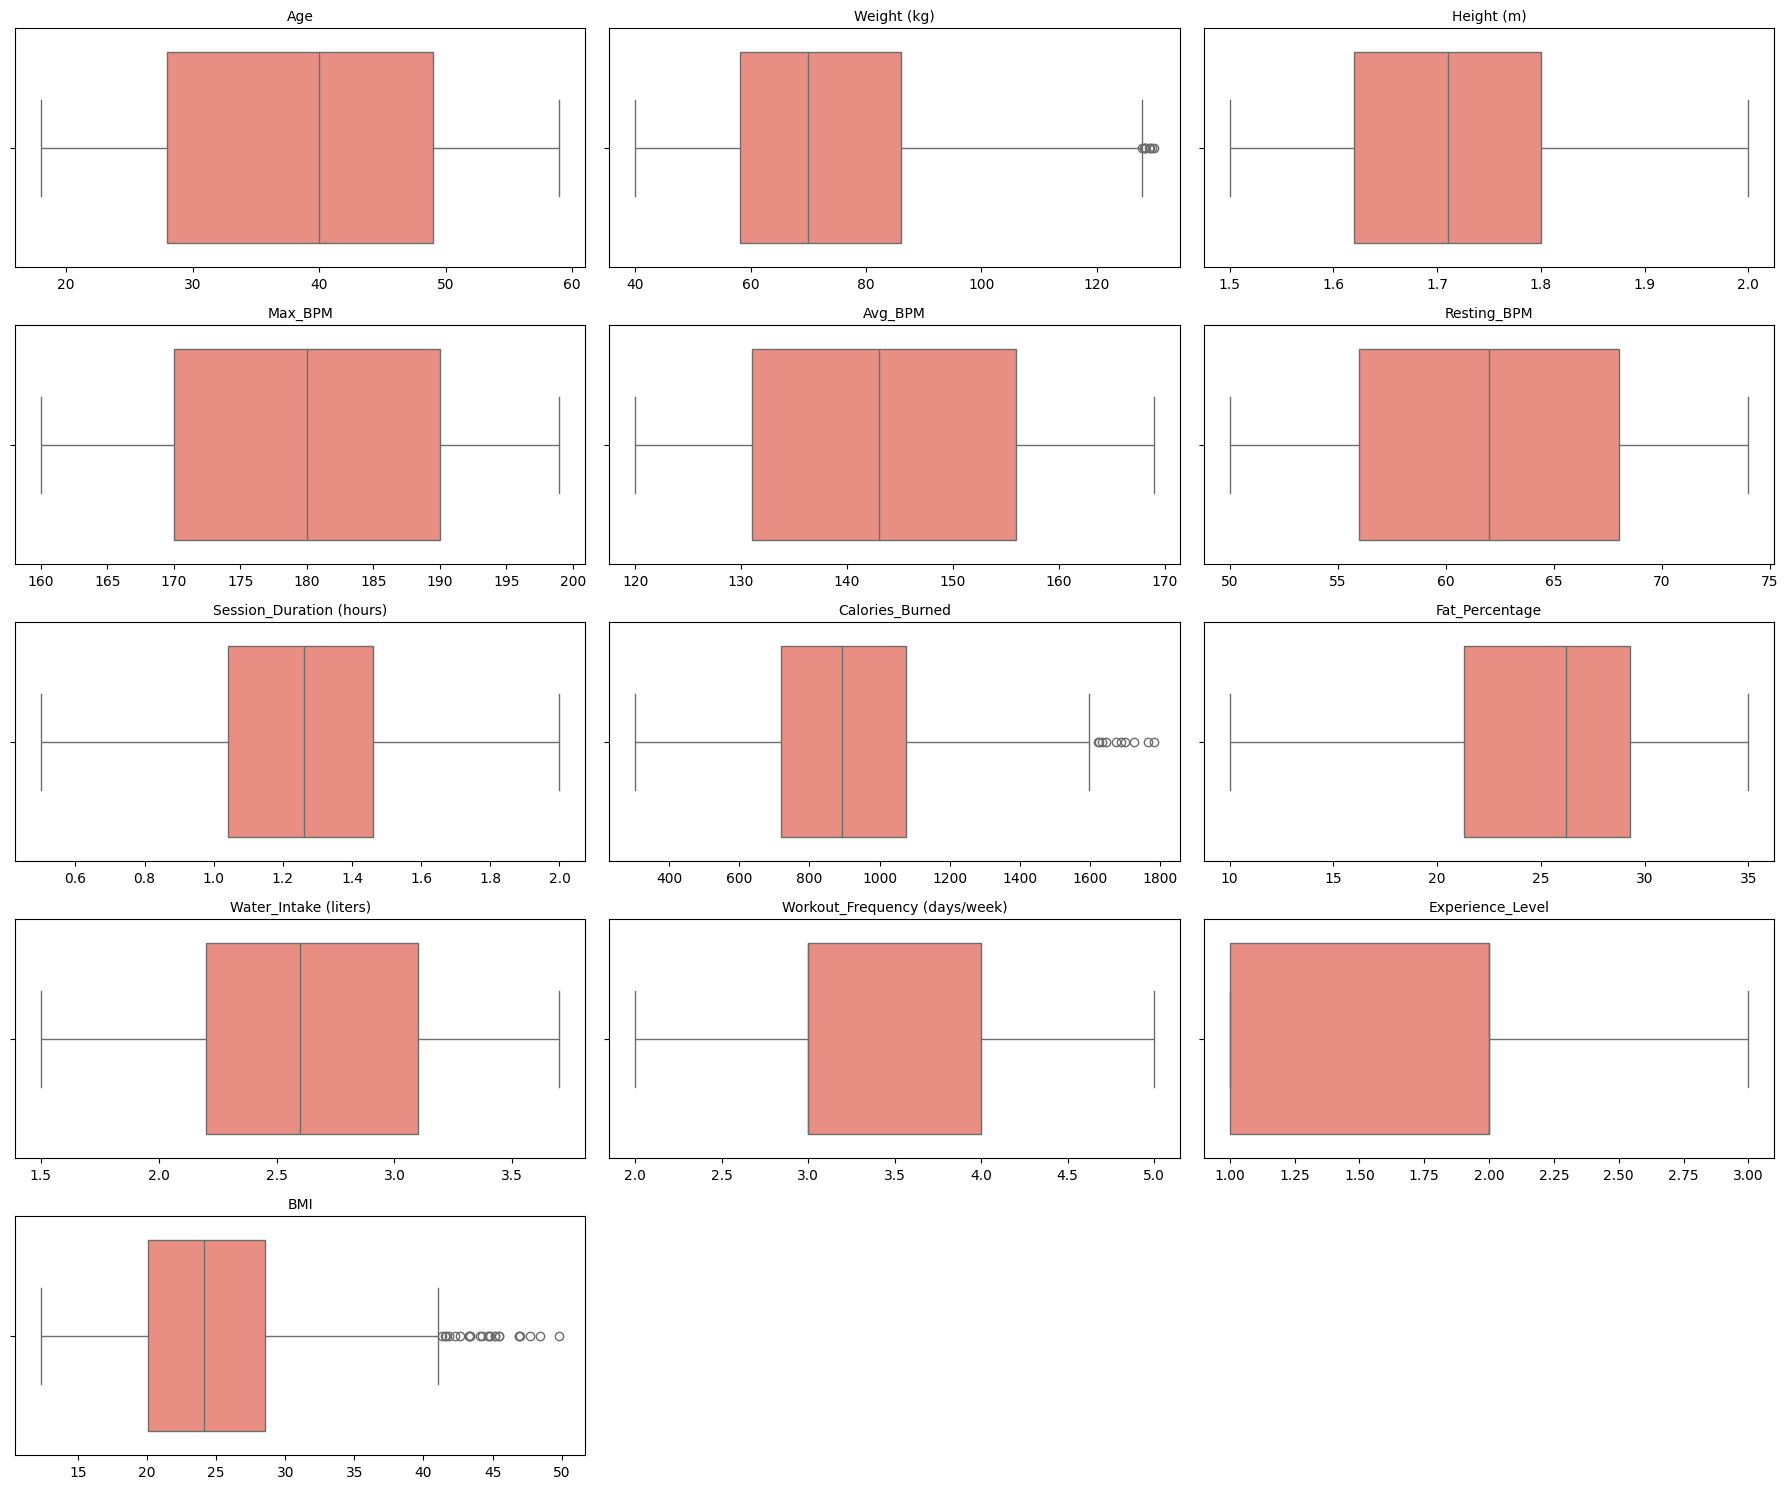

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns = len(kolom_numerik)
num_cols = 3
num_rows = (num_columns + num_cols - 1) // num_cols

plt.figure(figsize=(18, num_rows * 3))
for i, column in enumerate(kolom_numerik, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], orient='h', color='salmon')
    plt.title(column, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

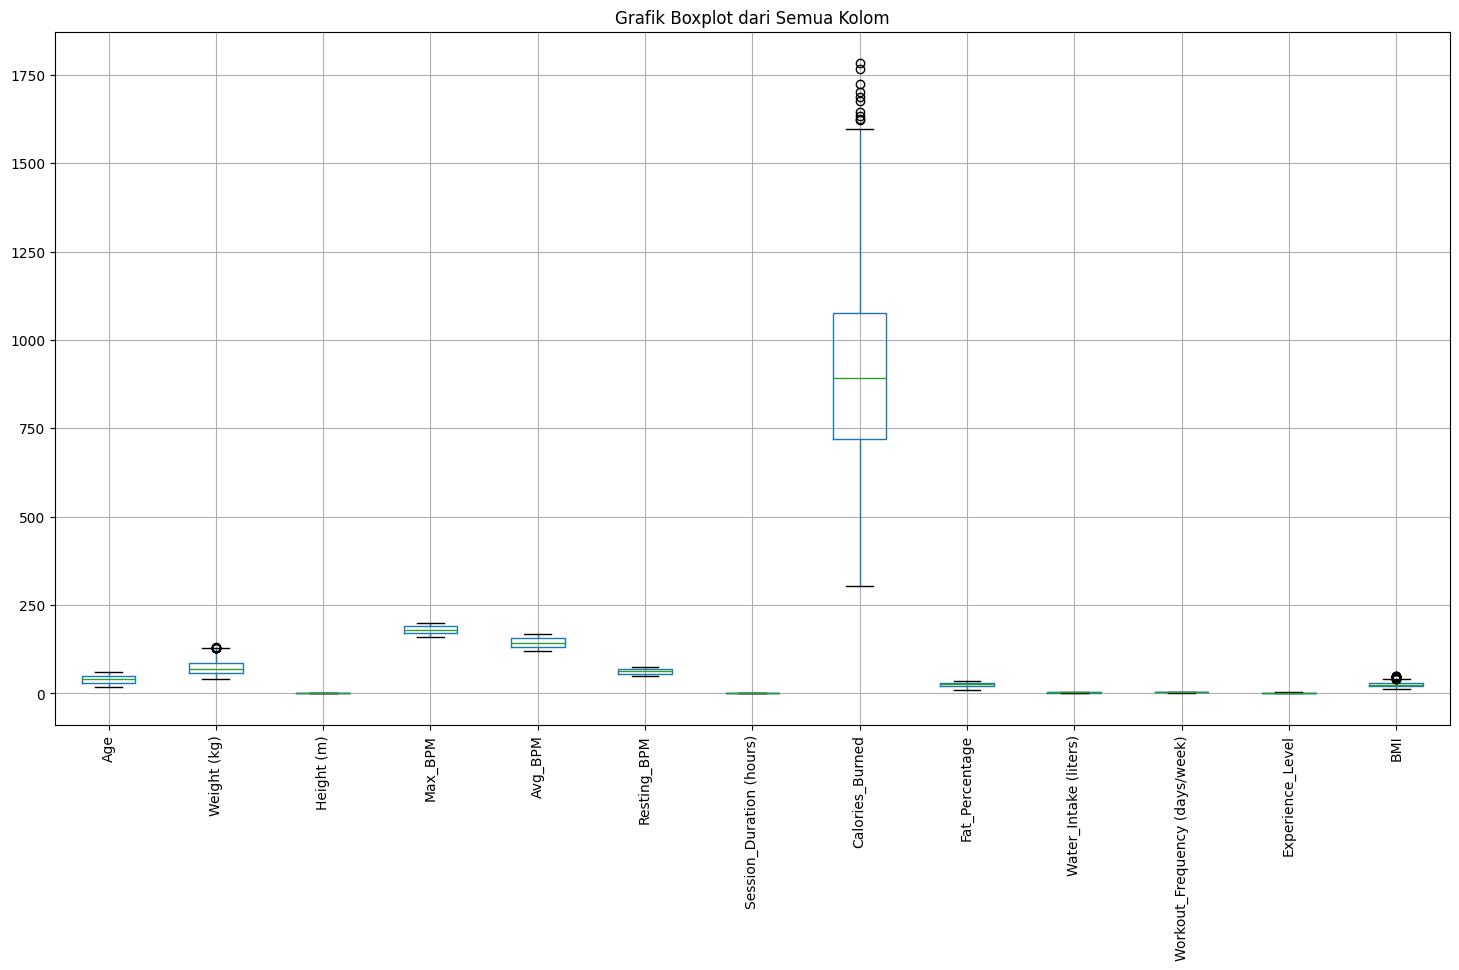

In [98]:
plt.figure(figsize=(18, 9))
df.boxplot(rot=90)
plt.title("Grafik Boxplot dari Semua Kolom")
plt.show()

 ## Data Preprocessing

In [99]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Gender', 'Workout_Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1364.0,2,10.0,3.5,4,3,28.77
969,25,1,66.6,1.61,184,166,56,1.38,1260.0,2,25.0,3.0,2,1,25.69
970,59,0,60.4,1.76,194,120,53,1.72,929.0,0,18.8,2.7,5,3,19.50
971,32,1,126.4,1.83,198,146,62,1.10,883.0,1,28.2,2.1,3,2,37.74


In [100]:
gender_mapping = {index: label for index, label in enumerate(label_encoders['Gender'].classes_)}
print("Mapping untuk kolom 'Gender':", gender_mapping)

workout_mapping = {index: label for index, label in enumerate(label_encoders['Workout_Type'].classes_)}
print("Mapping untuk kolom 'Workout_Type':", workout_mapping)

Mapping untuk kolom 'Gender': {0: 'Female', 1: 'Male'}
Mapping untuk kolom 'Workout_Type': {0: 'Cardio', 1: 'HIIT', 2: 'Strength', 3: 'Yoga'}


In [101]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

def clean_outlier(df, kolom, metode='zscore', threshold=3):
    if metode == 'zscore':

        z_scores = np.abs((df[kolom] - df[kolom].mean()) / df[kolom].std())
        return df[z_scores < threshold]

    elif metode == 'iqr':

        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IQR = Q3 - Q1

        batas_bawah = Q1 - threshold * IQR
        batas_atas = Q3 + threshold * IQR

        return df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]

df = clean_outlier(df, numeric_columns, metode='iqr', threshold=1.5)
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [102]:
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),9
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,10
Workout_Type,0


In [103]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


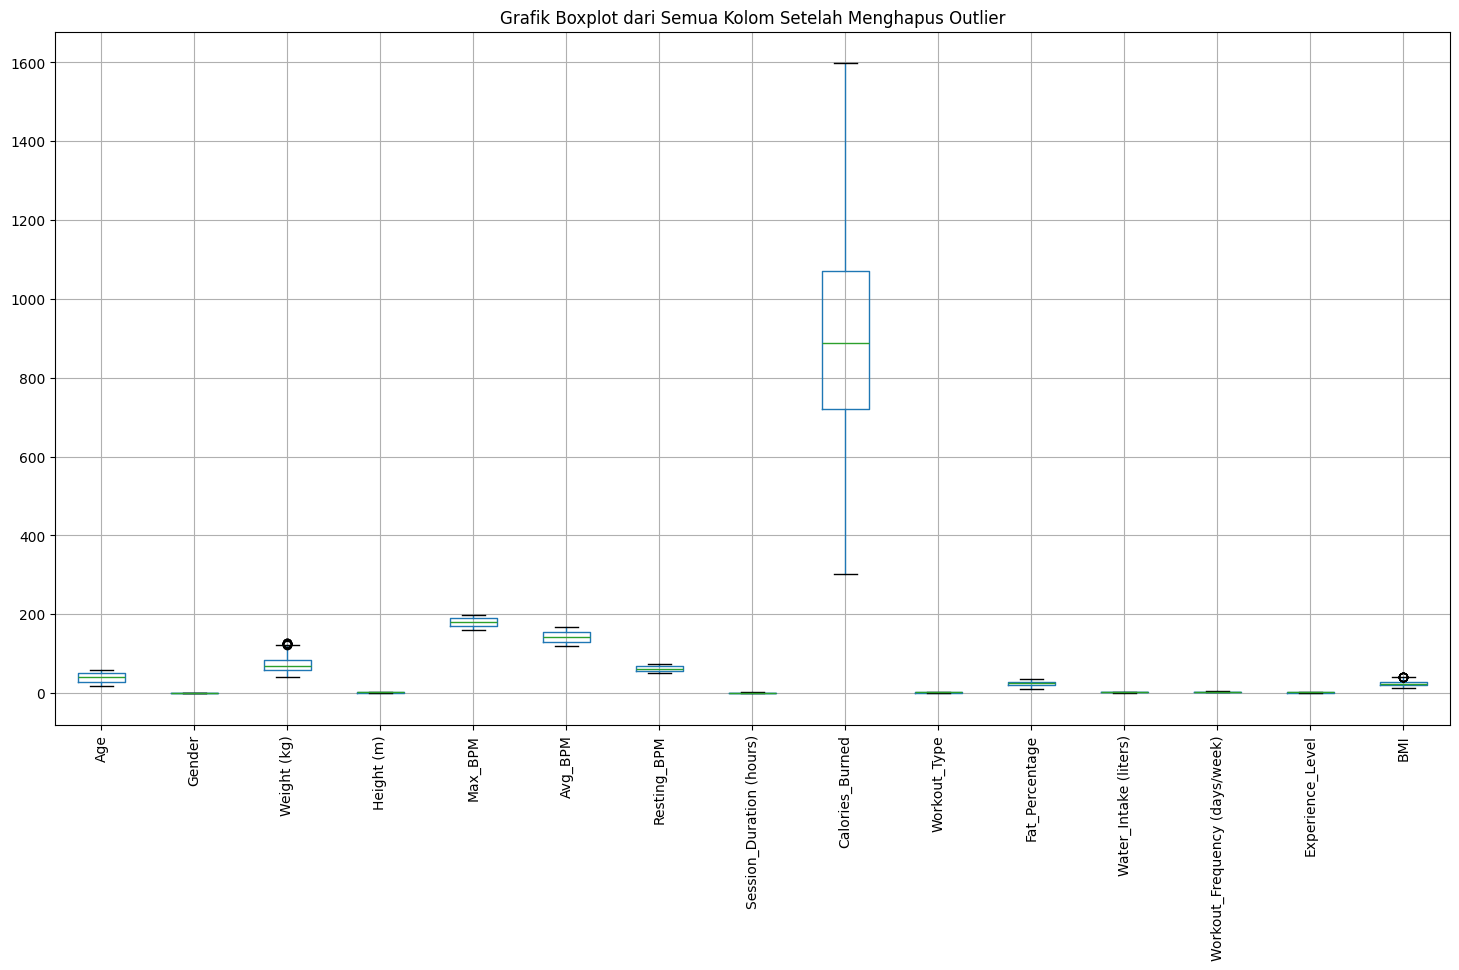

In [104]:
plt.figure(figsize=(18, 9))
df.boxplot(rot=90)
plt.title("Grafik Boxplot dari Semua Kolom Setelah Menghapus Outlier")
plt.show()